In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [42]:
# Load the dataset
data_path = 'AirQualityUCI _ Students.xlsx'
data = pd.read_excel(data_path)
print(data.dtypes)

Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                  int64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object


# Preprocess the data

In [43]:
# Ensure 'Date' and 'Time' are strings before concatenation
data['Date'] = data['Date'].astype(str)
data['Time'] = data['Time'].astype(str)

# Combine 'Date' and 'Time' columns into a single datetime column
data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
print(data['DateTime'].dtype)


datetime64[ns]


In [44]:
data.drop(columns=['Date', 'Time'], inplace=True)

# Set DateTime as index, facilitate plot
data.set_index('DateTime', inplace=True)

# Sort data by DateTime
data.sort_values(by='DateTime', inplace=True)

# Generate a complete range of dates and times
full_time_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq='H')

# Reindex the DataFrame to include all dates and times, filling missing ones with NaN
data = data.reindex(full_time_range)

# Replace missing values (-200) with NaN
data.replace(-200, pd.NA, inplace=True)

# Fill missing values with data 7 days after recursively
for i in range(2):
    data['CO(GT)'] = data['CO(GT)'].combine_first(data['CO(GT)'].shift(-7*24*(i+1)))

print(data['CO(GT)'].loc['2004-03-18 04:00:00'])

# Ensure there are no remaining NA values by forward and backward fill
data['CO(GT)'].fillna(method='ffill', inplace=True)
data['CO(GT)'].fillna(method='bfill', inplace=True)


0.5


In [45]:
# Assuming 'data' is your original DataFrame with a DateTime index
# Resample the data to daily frequency
# data = data.resample('D').asfreq()

# # Print the new index to verify the frequency
# print(data.index)
# print(data)


In [46]:
data['CO(GT)'] = data['CO(GT)'].combine_first(data['CO(GT)'].shift(-7*24))
# data['CO(GT)'].loc['2004-03-18'] = data['CO(GT)'].loc['2004-03-25'].values
print(data['CO(GT)'].loc['2004-03-18'])

print(data['CO(GT)'].loc['2004-03-11 04:00:00'])


2004-03-18 00:00:00    1.3
2004-03-18 01:00:00    1.0
2004-03-18 02:00:00    0.7
2004-03-18 03:00:00    0.7
2004-03-18 04:00:00    0.5
2004-03-18 05:00:00    0.5
2004-03-18 06:00:00    0.6
2004-03-18 07:00:00    1.1
2004-03-18 08:00:00    2.7
2004-03-18 09:00:00    3.5
2004-03-18 10:00:00    2.3
2004-03-18 11:00:00    1.6
2004-03-18 12:00:00    1.3
2004-03-18 13:00:00    2.0
2004-03-18 14:00:00    1.9
2004-03-18 15:00:00    1.9
2004-03-18 16:00:00    2.2
2004-03-18 17:00:00    2.0
2004-03-18 18:00:00    2.9
2004-03-18 19:00:00    5.2
2004-03-18 20:00:00    4.6
2004-03-18 21:00:00    2.5
2004-03-18 22:00:00    1.5
2004-03-18 23:00:00    1.2
Freq: H, Name: CO(GT), dtype: float64
0.5



Plot the CO(GT) concentration over time to analyze which model to use

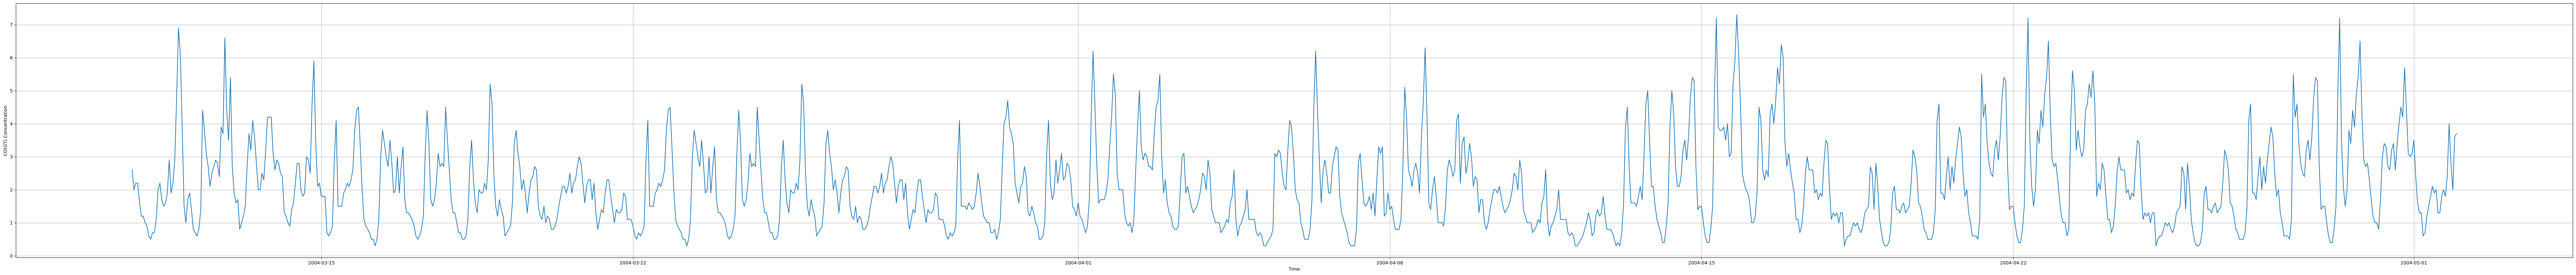

In [47]:
start_date = '2004-3-1'
end_date = '2004-5-1'

# Filter the DataFrame by the specified date range
filtered_data = data.loc[start_date:end_date]

plt.figure(figsize=(100, 10))
plt.plot(filtered_data['CO(GT)'])
# print(filtered_data)
plt.xlabel('Time')
plt.ylabel('CO(GT) Concentration')
plt.grid()
plt.show()

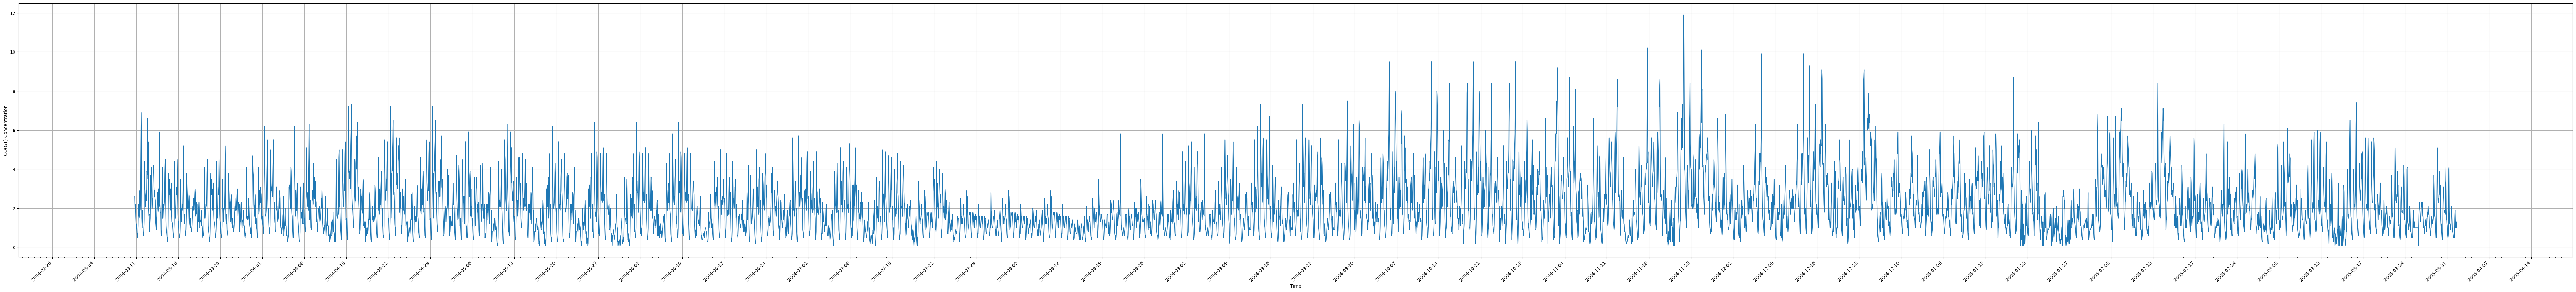

In [48]:
import matplotlib.dates as mdates


plt.figure(figsize=(100, 10))
plt.plot(data['CO(GT)'])
plt.xlabel('Time')
plt.ylabel('CO(GT) Concentration')

# Set major and minor ticks format for filtered_data plot
ax = plt.gca()  # Get current axis
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))  # Major ticks every 7 days
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))  # Minor ticks every 12 hours
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate and align the tick labels
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.grid()
plt.show()


In [49]:
print(data['CO(GT)'].loc['2004-03-25'])
print(data['CO(GT)'].loc['2004-03-11'])

2004-03-25 00:00:00    1.3
2004-03-25 01:00:00    1.0
2004-03-25 02:00:00    0.7
2004-03-25 03:00:00    0.7
2004-03-25 04:00:00    0.5
2004-03-25 05:00:00    0.5
2004-03-25 06:00:00    0.6
2004-03-25 07:00:00    1.1
2004-03-25 08:00:00    2.7
2004-03-25 09:00:00    3.5
2004-03-25 10:00:00    2.3
2004-03-25 11:00:00    1.6
2004-03-25 12:00:00    1.3
2004-03-25 13:00:00    2.0
2004-03-25 14:00:00    1.9
2004-03-25 15:00:00    1.9
2004-03-25 16:00:00    2.2
2004-03-25 17:00:00    2.0
2004-03-25 18:00:00    2.9
2004-03-25 19:00:00    5.2
2004-03-25 20:00:00    4.6
2004-03-25 21:00:00    2.5
2004-03-25 22:00:00    1.5
2004-03-25 23:00:00    1.2
Freq: H, Name: CO(GT), dtype: float64
2004-03-11 00:00:00    1.2
2004-03-11 01:00:00    1.0
2004-03-11 02:00:00    0.9
2004-03-11 03:00:00    0.6
2004-03-11 04:00:00    0.5
2004-03-11 05:00:00    0.7
2004-03-11 06:00:00    0.7
2004-03-11 07:00:00    1.1
2004-03-11 08:00:00    2.0
2004-03-11 09:00:00    2.2
2004-03-11 10:00:00    1.7
2004-03-11 11:00:

The data shows periodic with 7 days as a period, hence fill missing data with the data 7 days after and use Fourier Series do regression to predict.

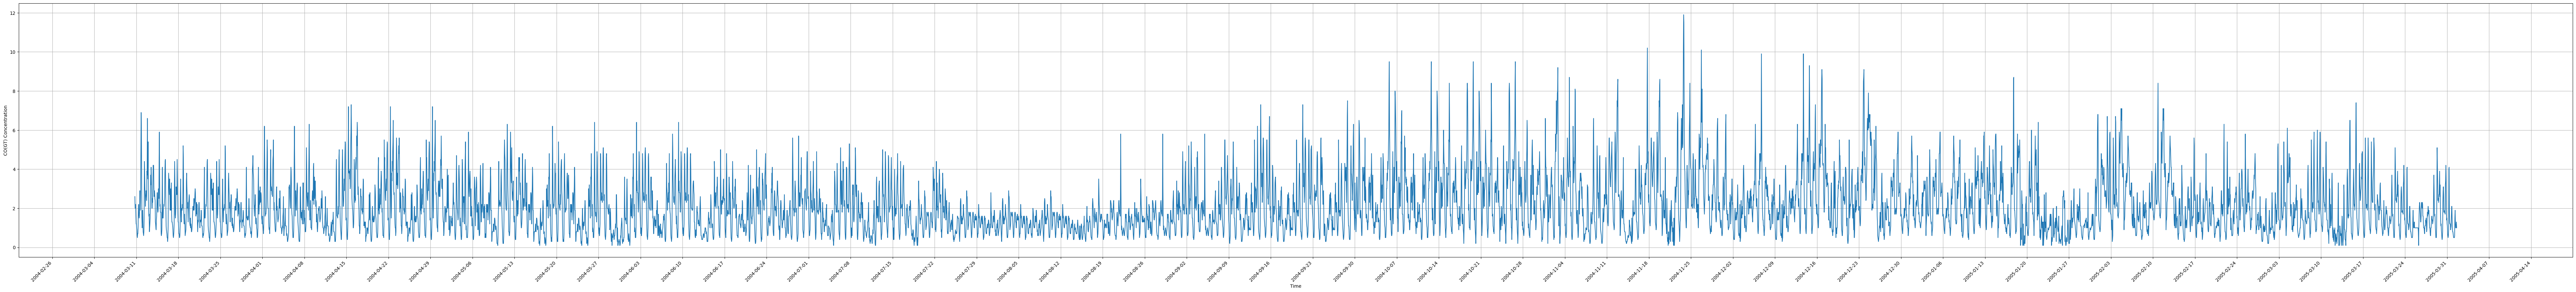

In [50]:
# Fill missing values with data 7 days after
data['CO(GT)'] = data['CO(GT)'].combine_first(data['CO(GT)'].shift(-7))

plt.figure(figsize=(100, 10))
plt.plot(data['CO(GT)'])
plt.xlabel('Time')
plt.ylabel('CO(GT) Concentration')

# Set major and minor ticks format for filtered_data plot
ax = plt.gca()  # Get current axis
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))  # Major ticks every 7 days
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate and align the tick labels
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.grid()
plt.show()

# Fourier Series

In [51]:
n_s = data.shape[0]  # number of samples

time_numeric = (data.index - data.index[0]).total_seconds()
time_numeric = np.array(time_numeric)

print(time_numeric)


[0.00000e+00 3.60000e+03 7.20000e+03 ... 3.34152e+07 3.34188e+07
 3.34224e+07]


In [52]:
import sys
from sklearn.linear_model import LinearRegression

# Function to create Fourier series components
def fourier_features(t, n_harmonics):
    t = t[:, np.newaxis]
    x = np.concatenate([np.sin(2 * np.pi * (i + 1) * t / t.max()) for i in range(n_harmonics)] +
                       [np.cos(2 * np.pi * (i + 1) * t / t.max()) for i in range(n_harmonics)], axis=1)
    
    return x

# Number of harmonics to use
n_harmonics = 1000

# Create Fourier features
X = fourier_features(time_numeric, n_harmonics)
y = data['CO(GT)'].values  # [2.6 2.  2.2 ... 1.1 1.3 1. ] numpy.ndarray


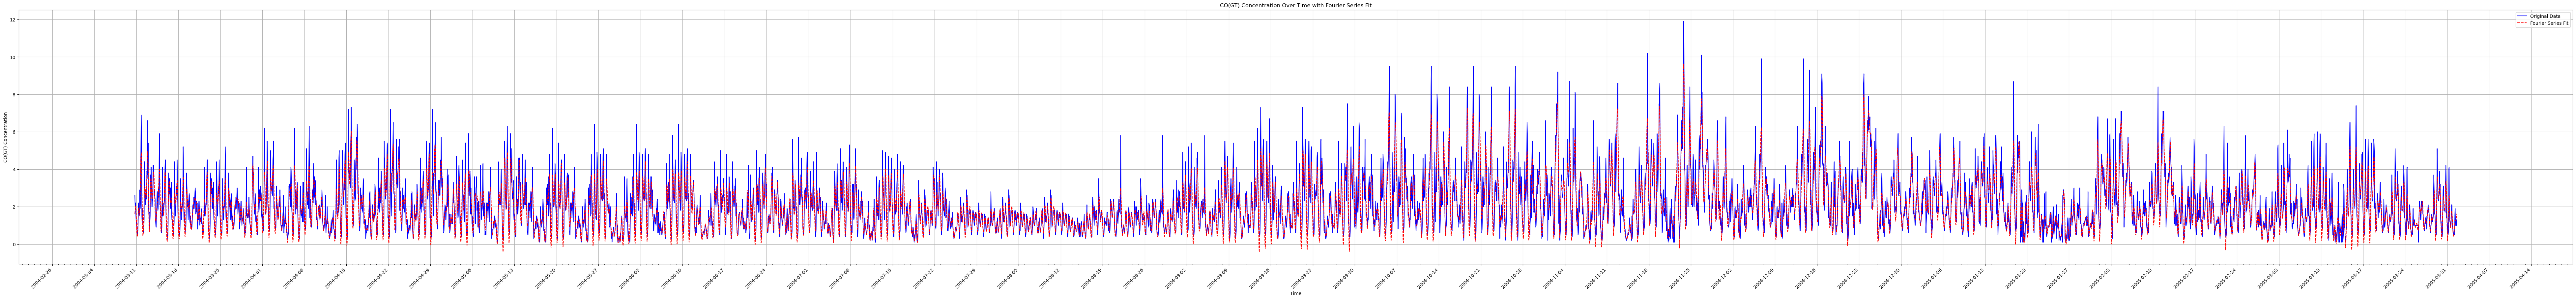

In [53]:

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plot the original data and the Fourier series fit
plt.figure(figsize=(100, 10))
plt.plot(data.index, data['CO(GT)'], label='Original Data', color='b')
plt.plot(data.index, y_pred, label='Fourier Series Fit', color='r', linestyle='--')
plt.xlabel('Time')
plt.ylabel('CO(GT) Concentration')
plt.title('CO(GT) Concentration Over Time with Fourier Series Fit')
plt.legend()

# Set major and minor ticks format for filtered_data plot
ax = plt.gca()  # Get current axis
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))  # Major ticks every 7 days
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))  # Minor ticks every day
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate and align the tick labels
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

plt.grid()
plt.show()